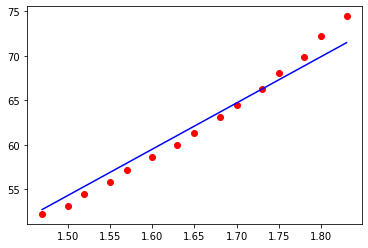

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets


d = pd.read_csv('/content/height_and_weight_lr.csv')
data = d.to_numpy()
Data = np.delete(data, slice(14,2),1)
x_numpy = Data[:,0]
y_numpy = Data[:,1]
x_ = torch.from_numpy(x_numpy.astype(np.float32))
y_ = torch.from_numpy(y_numpy.astype(np.float32))
x = x_.view(x_.shape[0],1)
y = y_.view(y_.shape[0],1)

n_samples,n_features = x.shape
input_size = n_features
output_size = n_features
model = nn.Linear(input_size,output_size)

criterion = nn.MSELoss()
learning_rate = 0.1
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate)

num_epoch = 2000
for epoch in range(num_epoch):
  y_predicted = model(x)
  loss = criterion(y_predicted,y)
  loss.backward()
  optimiser.step()
  optimiser.zero_grad()
  if epoch + 1 % 10 == 0:
    print(f'epoch:{epoch + 1}')


predicted = model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')

